In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## LOAD DATA

In [51]:
house_data = pd.read_csv('/Users/nguyenbathiem/Documents/GitHub/StockBot/Real-Estate-Price-Prediction/house_price_eda/nhadatvn/cleaned_nhadatvn_data.csv')
house_data.head()

Mặt tiền  Số tầng  Số phòng vệ sinh  Số phòng ngủ  Đường vào  Diện tích  \
0       3.0      4.0               4.0           4.0        7.0       30.0   
1       4.3      4.0               4.0           4.0        4.0       50.0   
2       4.0      6.0               5.0           4.0        4.0       39.0   
3       4.6      6.0               5.0           5.0        1.0       48.0   
4       5.0      4.0               4.0           4.0        1.0       50.0   

           X           Y         Pháp lý  \
0  21.010153  105.798834  Sổ đỏ/ Sổ hồng   
1  21.034721  105.827155  Sổ đỏ/ Sổ hồng   
2  21.034989  105.793802  Sổ đỏ/ Sổ hồng   
3  21.034989  105.793802  Sổ đỏ/ Sổ hồng   
4  21.023258  105.807148  Sổ đỏ/ Sổ hồng   

                                             Địa chỉ  \
0            Phường Trung Hoà, Quận Cầu Giấy, Hà Nội   
1      Đội cấn, Phường Đội Cấn, Quận Ba Đình, Hà Nội   
2  Cầu Giấy, Phường Dịch Vọng, Quận Cầu Giấy, Hà Nội   
3  Cầu Giấy, Phường Dịch Vọng, Quận Cầu Giấy, Hà Nội   
4    Chùa Láng, Phường Láng Hạ, Quận Đống Đa, Hà Nội   

                                               Mô tả   Ngày đăng Ngày hết hạn  \
0  01 căn duy nhất Trung Kính, ô tô tránh, hai th...  14/12/2022   24/12/2022   
1  Ngõ 294 Đội Cấn là ngõ thông sang ngõ 10 Kim M...  15/03/2023   25/03/2023   
2  Bán nhà mặt ngõ Cầu Giấy 6 tầng PHÂN LÔ Ô TÔ T...  15/03/2023   25/03/2023   
3  Bán nhà Cầu Giấy, PHÂN LÔ Ô TÔ 48m2 6T 9 tỷ Ô ...  15/03/2023   25/03/2023   
4  Vị trí hót nhất đống đa trong phân khúc dưới 4...  15/03/2023   25/03/2023   

           Loại BĐS Hướng nhà Hướng ban công  Giá  
0  Bán nhà ngõ, hẻm       NaN            NaN  6.7  
1  Bán nhà ngõ, hẻm       NaN            NaN  6.3  
2  Bán nhà ngõ, hẻm       NaN            NaN  7.9  
3  Bán nhà ngõ, hẻm       NaN            NaN  9.2  
4  Bán nhà ngõ, hẻm       NaN            NaN  3.5

In [52]:
house_data.describe()
house_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18382 entries, 0 to 18381
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Mặt tiền          16009 non-null  float64
 1   Số tầng           15285 non-null  float64
 2   Số phòng vệ sinh  13718 non-null  float64
 3   Số phòng ngủ      14758 non-null  float64
 4   Đường vào         18150 non-null  float64
 5   Diện tích         18345 non-null  float64
 6   X                 18357 non-null  float64
 7   Y                 18357 non-null  float64
 8   Pháp lý           18349 non-null  object 
 9   Địa chỉ           18357 non-null  object 
 10  Mô tả             18382 non-null  object 
 11  Ngày đăng         18382 non-null  object 
 12  Ngày hết hạn      18382 non-null  object 
 13  Loại BĐS          18382 non-null  object 
 14  Hướng nhà         245 non-null    object 
 15  Hướng ban công    151 non-null    object 
 16  Giá               18382 non-null  float6

In [53]:
# # Identify float columns
# float_columns = house_data.select_dtypes(include=['float64']).columns

# # Plot each float column
# for col in float_columns:
#     house_data[col].value_counts().sort_index().plot(kind='bar', title=col)
#     plt.show()

## REMOVING OUTLIER

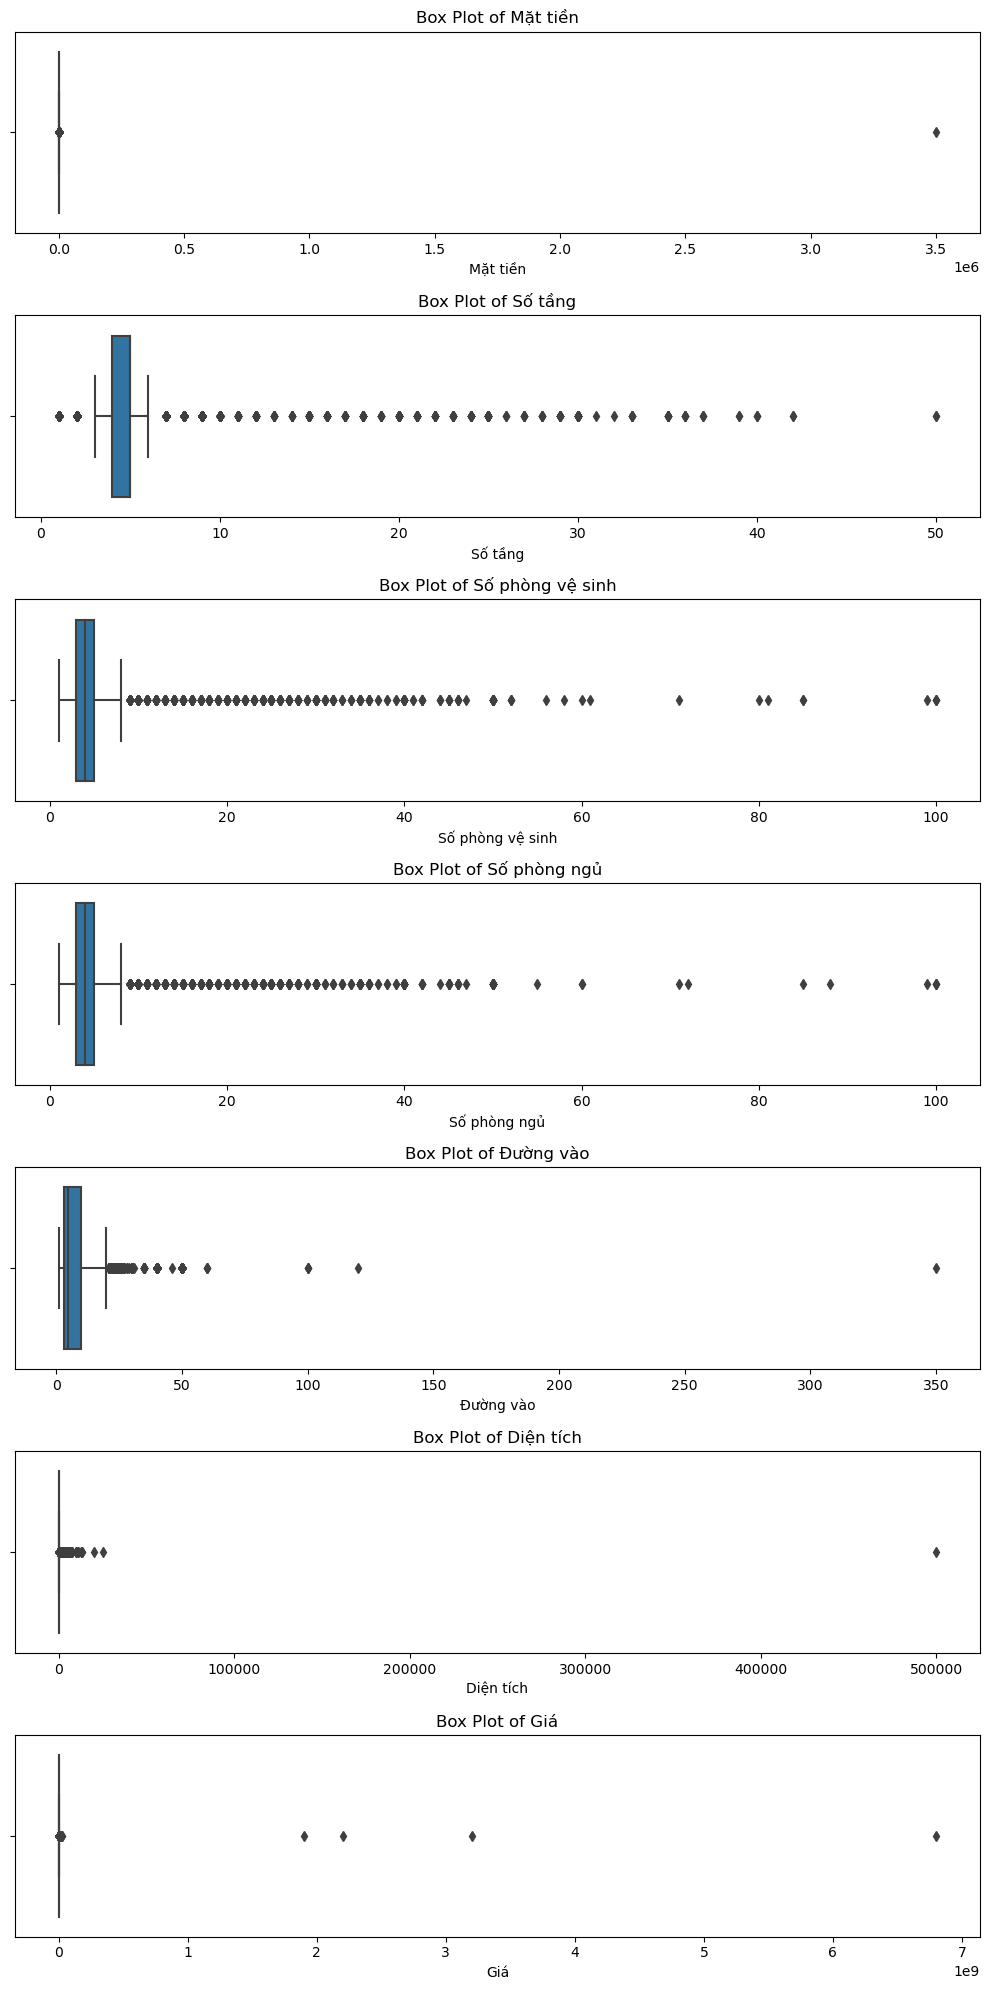

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'data' is your DataFrame
columns_to_plot = ['Mặt tiền', 'Số tầng', 'Số phòng vệ sinh', 'Số phòng ngủ', 'Đường vào', 'Diện tích', 'Giá']

# Convert columns to numeric
for col in columns_to_plot:
    house_data[col] = pd.to_numeric(house_data[col], errors='coerce')

# Plotting
fig, axes = plt.subplots(nrows=len(columns_to_plot), ncols=1, figsize=(10, 20))

for i, col in enumerate(columns_to_plot):
    sns.boxplot(data=house_data, x=col, ax=axes[i])
    axes[i].set_title(f'Box Plot of {col}')

plt.tight_layout()
plt.show()


In [55]:
copy_house_data = house_data.copy()
copy_house_data['Loại BĐS'].unique()
# copy_house_data['Loại BĐS'].value_counts().sort_index().plot(kind='bar', title=col)
# plt.show()
# 'Bán căn hộ chung cư'
# Getting the description ('Mô tả') of the house with the maximum 'Đường vào' value
# copy_house_data[copy_house_data['Số phòng ngủ']==copy_house_data['Số phòng ngủ'].max()].head()
# copy_house_data[copy_house_data['Đường vào']==copy_house_data['Đường vào'].max()]


#outlier consider
# copy_house_data[copy_house_data['Mặt tiền']==copy_house_data['Mặt tiền'].max()]
# copy_house_data[copy_house_data['Diện tích']==copy_house_data['Diện tích'].max()].head()
# copy_house_data[copy_house_data['Giá']==copy_house_data['Giá'].max()].head()

array(['Bán nhà ngõ, hẻm', 'Bán nhà mặt tiền', 'Bán căn hộ chung cư',
       'Bán biệt thự, villa,', 'Bán đất thổ cư',
       'Bán loại bất động sản khác', 'Bán đất nền dự án', 'Bán Shophouse',
       'Bán nhà cấp 4', 'Bán nhà trọ', 'Bán kho xưởng', 'Bán condotel',
       'Bán đất nông nghiệp'], dtype=object)

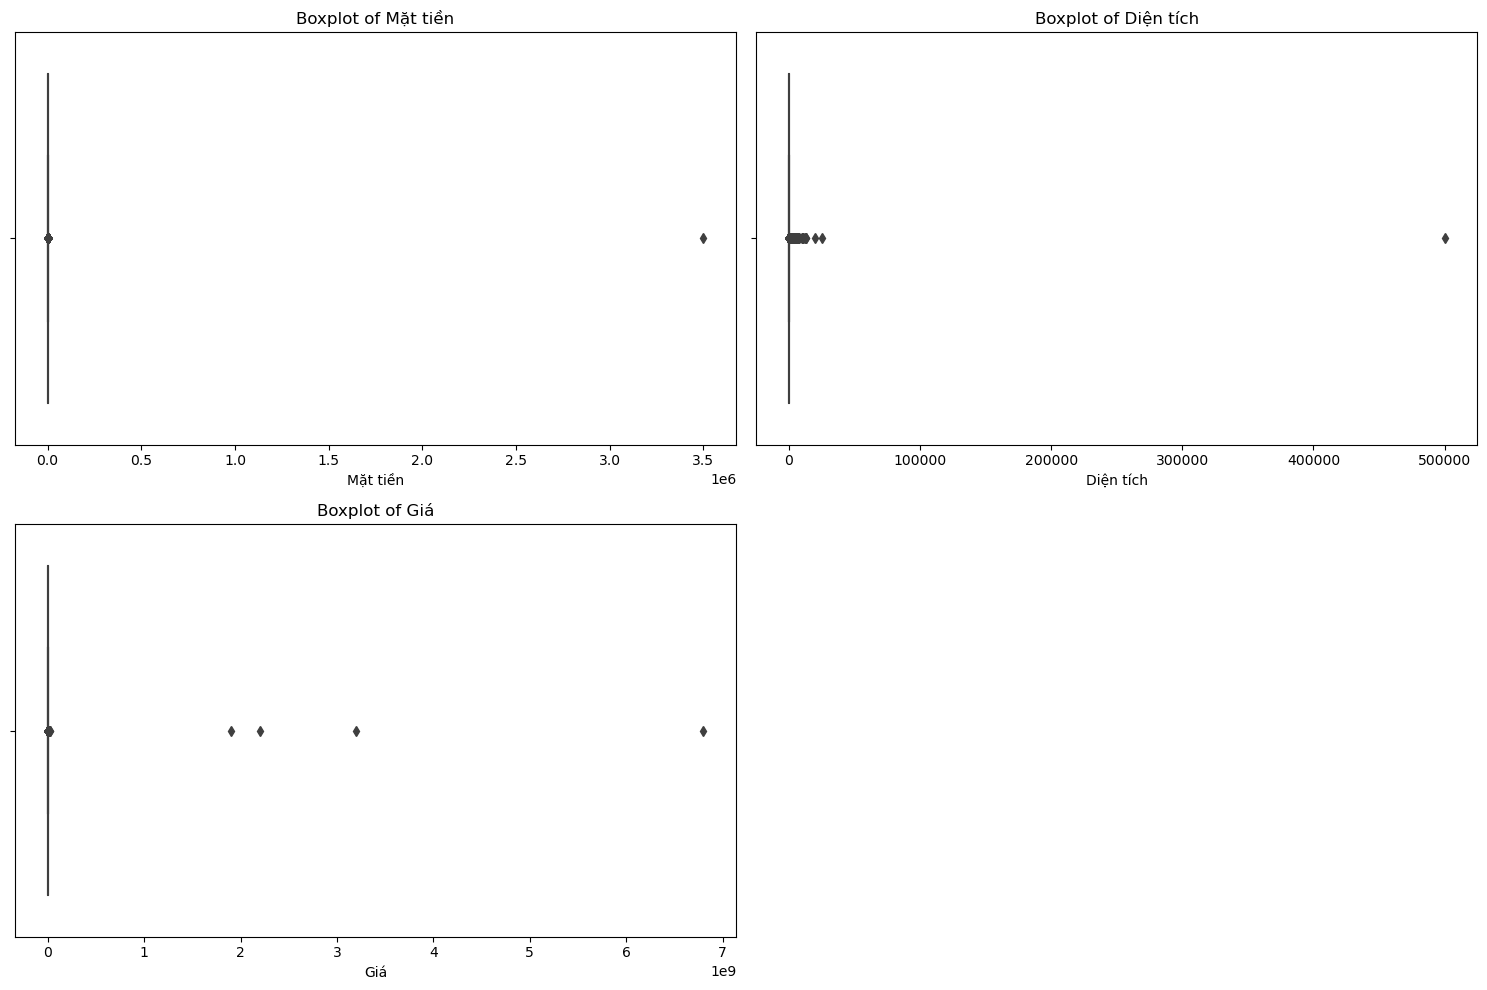

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12766 entries, 0 to 18381
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Mặt tiền          12766 non-null  float64
 1   Số tầng           10810 non-null  float64
 2   Số phòng vệ sinh  9949 non-null   float64
 3   Số phòng ngủ      10646 non-null  float64
 4   Đường vào         12709 non-null  float64
 5   Diện tích         12766 non-null  float64
 6   X                 12766 non-null  float64
 7   Y                 12766 non-null  float64
 8   Pháp lý           12766 non-null  object 
 9   Địa chỉ           12766 non-null  object 
 10  Mô tả             12766 non-null  object 
 11  Ngày đăng         12766 non-null  object 
 12  Ngày hết hạn      12766 non-null  object 
 13  Loại BĐS          12766 non-null  object 
 14  Hướng nhà         142 non-null    object 
 15  Hướng ban công    97 non-null     object 
 16  Giá               12766 non-null  float6

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns
data = house_data.copy()
# Columns to remove outliers from
columns = ['Mặt tiền', 'Diện tích', 'Giá'] #, 'Đường vào'

# Plotting boxplots for each column to visualize outliers
plt.figure(figsize=(15, 10))
for i, col in enumerate(columns):
    plt.subplot(2, 2, i + 1)
    sns.boxplot(x=data[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

# Removing outliers using IQR method
filtered_data = data.copy()
for col in columns:
    Q1 = filtered_data[col].quantile(0.25)
    Q3 = filtered_data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    filtered_data = filtered_data[(filtered_data[col] >= lower_bound) & (filtered_data[col] <= upper_bound)]

# Show the shape of the dataset before and after outlier removal
original_shape = data.shape
filtered_shape = filtered_data.shape

original_shape, filtered_shape
house_data = filtered_data.copy()
house_data.info()

In [57]:
# copy_house_data = house_data.copy()
# copy_house_data = copy_house_data.dropna(subset=['X'])
# copy_house_data.info() 
# copy_house_data.shape
house_data.nunique()

Mặt tiền              143
Số tầng                38
Số phòng vệ sinh       35
Số phòng ngủ           35
Đường vào              42
Diện tích             120
X                    1548
Y                    1427
Pháp lý                 3
Địa chỉ              2691
Mô tả               12766
Ngày đăng             426
Ngày hết hạn          429
Loại BĐS               11
Hướng nhà               8
Hướng ban công          8
Giá                   322
dtype: int64

In [58]:
import folium
from branca.colormap import linear

# Assuming 'house_data' has 'X', 'Y', and 'Giá' columns
coordinates = house_data[['X', 'Y']].values.tolist()
prices = house_data['Giá'].tolist()

# Creating a color scale for the prices
max_price = max(prices)
min_price = min(prices)
colormap = linear.YlOrRd_09.scale(min_price, max_price)

# Create a map centered around the first coordinate
map = folium.Map(location=coordinates[0], zoom_start=13)

# Add circle markers to the map
for (lat, lon), price in zip(coordinates, prices):
    # Color based on price
    color = colormap(price)

    # Create circle marker
    folium.CircleMarker(
        location=[lat, lon],
        radius=5,  # You can adjust the size
        color=color,
        fill=True,
        fill_color=color
    ).add_to(map)

# Add the color map legend to the map
colormap.caption = 'Price Scale'
colormap.add_to(map)

# Display the map
map


## TRANSFORMING DATA

In [59]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12766 entries, 0 to 18381
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Mặt tiền          12766 non-null  float64
 1   Số tầng           10810 non-null  float64
 2   Số phòng vệ sinh  9949 non-null   float64
 3   Số phòng ngủ      10646 non-null  float64
 4   Đường vào         12709 non-null  float64
 5   Diện tích         12766 non-null  float64
 6   X                 12766 non-null  float64
 7   Y                 12766 non-null  float64
 8   Pháp lý           12766 non-null  object 
 9   Địa chỉ           12766 non-null  object 
 10  Mô tả             12766 non-null  object 
 11  Ngày đăng         12766 non-null  object 
 12  Ngày hết hạn      12766 non-null  object 
 13  Loại BĐS          12766 non-null  object 
 14  Hướng nhà         142 non-null    object 
 15  Hướng ban công    97 non-null     object 
 16  Giá               12766 non-null  float6

### Transform

In [66]:
# Example DataFrame
data = house_data.copy()
# Replace NaN values in specified columns with 'NaN'
data[['Pháp lý', 'Loại BĐS', 'Hướng nhà', 'Hướng ban công']] = data[['Pháp lý', 'Loại BĐS', 'Hướng nhà', 'Hướng ban công']].fillna('NaN')

print(data['Hướng ban công'].head())
one_hot_df = pd.get_dummies(data, columns=['Pháp lý','Loại BĐS','Hướng nhà', 'Hướng ban công'])
one_hot_df.drop(['Mô tả', 'Ngày đăng', 'Ngày hết hạn', 'Địa chỉ'], axis=1, inplace=True)
one_hot_df.head()
# one_hot_df['Y'].max()
# one_hot_df.info()

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
Name: Hướng ban công, dtype: object


Mặt tiền  Số tầng  Số phòng vệ sinh  Số phòng ngủ  Đường vào  Diện tích  \
0       3.0      4.0               4.0           4.0        7.0       30.0   
1       4.3      4.0               4.0           4.0        4.0       50.0   
2       4.0      6.0               5.0           4.0        4.0       39.0   
3       4.6      6.0               5.0           5.0        1.0       48.0   
4       5.0      4.0               4.0           4.0        1.0       50.0   

           X           Y  Giá  Pháp lý_Hợp đồng mua bán  ...  \
0  21.010153  105.798834  6.7                         0  ...   
1  21.034721  105.827155  6.3                         0  ...   
2  21.034989  105.793802  7.9                         0  ...   
3  21.034989  105.793802  9.2                         0  ...   
4  21.023258  105.807148  3.5                         0  ...   

   Hướng nhà_Đông Nam  Hướng ban công_Bắc  Hướng ban công_NaN  \
0                   0                   0                   1   
1                   0                   0                   1   
2                   0                   0                   1   
3                   0                   0                   1   
4                   0                   0                   1   

   Hướng ban công_Nam  Hướng ban công_Tây  Hướng ban công_Tây Bắc  \
0                   0                   0                       0   
1                   0                   0                       0   
2                   0                   0                       0   
3                   0                   0                       0   
4                   0                   0                       0   

   Hướng ban công_Tây Nam  Hướng ban công_Đông  Hướng ban công_Đông Bắc  \
0                       0                    0                        0   
1                       0                    0                        0   
2                       0                    0                        0   
3                       0                    0                        0   
4                       0                    0                        0   

   Hướng ban công_Đông Nam  
0                        0  
1                        0  
2                        0  
3                        0  
4                        0  

[5 rows x 41 columns]

### Normalize

In [68]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np

# Assuming 'data' is your DataFrame and it contains the specified columns
columns_to_normalize = ['Mặt tiền', 'Số tầng', 'Số phòng vệ sinh', 'Số phòng ngủ', 'Đường vào', 'Diện tích', 'X', 'Y']

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Normalize each specified column
for column in columns_to_normalize:
    # Select the column and reshape it for the scaler
    col_values = one_hot_df[[column]]

    # Apply the scaler and transform the data
    # Flatten the normalized_values to 1D array
    normalized_values = scaler.fit_transform(col_values.fillna(col_values.mean()))
    normalized_values_flat = normalized_values.ravel()

    # Create a new column for the normalized data, preserving the original NaNs
    # Use the column from col_values directly for comparison
    one_hot_df[column] = np.where(col_values[column].isna(), col_values[column], normalized_values_flat)

# The DataFrame 'data' now has new columns with the prefix 'normalized_' containing the normalized values


In [69]:
one_hot_df.head()

Mặt tiền   Số tầng  Số phòng vệ sinh  Số phòng ngủ  Đường vào  Diện tích  \
0    0.2500  0.061224          0.076923      0.076923   0.060606   0.256198   
1    0.4125  0.061224          0.076923      0.076923   0.030303   0.421488   
2    0.3750  0.102041          0.102564      0.076923   0.030303   0.330579   
3    0.4500  0.102041          0.102564      0.102564   0.000000   0.404959   
4    0.5000  0.061224          0.076923      0.076923   0.000000   0.421488   

          X         Y  Giá  Pháp lý_Hợp đồng mua bán  ...  Hướng nhà_Đông Nam  \
0  0.820914  0.391557  6.7                         0  ...                   0   
1  0.825283  0.401282  6.3                         0  ...                   0   
2  0.825331  0.389829  7.9                         0  ...                   0   
3  0.825331  0.389829  9.2                         0  ...                   0   
4  0.823245  0.394412  3.5                         0  ...                   0   

   Hướng ban công_Bắc  Hướng ban công_NaN  Hướng ban công_Nam  \
0                   0                   1                   0   
1                   0                   1                   0   
2                   0                   1                   0   
3                   0                   1                   0   
4                   0                   1                   0   

   Hướng ban công_Tây  Hướng ban công_Tây Bắc  Hướng ban công_Tây Nam  \
0                   0                       0                       0   
1                   0                       0                       0   
2                   0                       0                       0   
3                   0                       0                       0   
4                   0                       0                       0   

   Hướng ban công_Đông  Hướng ban công_Đông Bắc  Hướng ban công_Đông Nam  
0                    0                        0                        0  
1                    0                        0                        0  
2                    0                        0                        0  
3                    0                        0                        0  
4                    0                        0                        0  

[5 rows x 41 columns]

### Feature Selection

## TRAINING

## TESTING